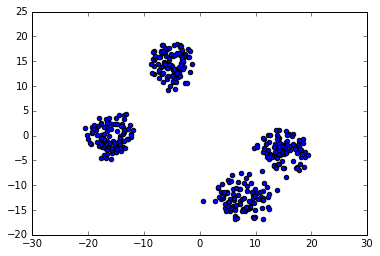

In [304]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.manifold import TSNE
from scipy.stats import rv_discrete

dim = 2
params = [(np.random.rand(1,dim) * 20, np.random.random() * 2) for _ in range(4)]
n = 100
X = np.ndarray((0,dim))
for mu, sigma in params:
    X = np.append(X, sigma * np.random.randn(n, dim) + mu, axis=0)

# reduce the dimensionality of the data set so we can plot it
model = TSNE(n_components=2, perplexity=80)
reduced = model.fit_transform(X)

plt.scatter(reduced[:,0], reduced[:,1])

In [77]:

#I have not tested the results to see if they make sense, but it does run and terminate so thats always good.
def centroids(points, closest, k):
    clusters = []
    for i in range(k):
        clusters.append(np.ndarray((0,len(points[0])))) #create a list of numpy arrays, one for each of the k centers, which we will add points to

    for i in range(len(points)):
        clusters[closest[i]] = np.append(clusters[closest[i]], [points[i]], axis=0) #add the point to an array for its closest center
        #now each center has a seperate numpy array containing all the points in its cluster
    avg = []
    for i in range(k):
        avg.append(tuple(np.mean(clusters[i], axis = 0))) #put the centroid of the cluster in an array called averages
    return avg

def kMeansIteration(centroids, points):
    clusters = [np.ndarray((None, points.shape[1])) for _ in range(len(centroids))]
    for p in range(len(points)):
        minDist = None
        closest = None
        for c in range(len(centroids)):
            dist = distance(centroids[c], points[p])
            if minDist is None or dist < minDist:
                minDist = dist
                closest = i
        clusters[closest] = np.append(clusters[closest], points[p], axis=0)
    newCentroids = []
    for cluster in clusters:
        print(cluster)
        if len(cluster) == 0:
            newCentroids.append(points[np.random.randint(0, len(points))])
        else:
            newCentroids.append(cluster.mean(axis=0))
    return newCentroids

def kMeans(k, points):
    assert k < len(points)
    centroids = points[:k] # first k points are our first centers

    newCentroids = kMeansIteration(centroids, points)
    return newCentroids
    #while oldCenters == [] or ((np.array(centers) - np.array(oldCenters))**2).sum() < 1e-16:
    print("iteration")
    oldCenters = centers
    clusters = [np.ndarray(points.shape) for _ in range(k)]
    for p in range(len(points)):
        minDist = None
        closest = None
        for c in range(len(centers)):
            dist = distance(centers[c], points[p])
            if minDist is None or dist < minDist:
                minDist = dist
                closest = i
        clusters[closest] = np.append(clusters[closest], points[p], axis=0)
    centers = [c.mean(axis=0) if len(c) > 0 else points[np.random.randint(0, len(points))] for c in clusters]

    print(centers)
    print(oldCenters)

    return clusters
        
# computes the distance between 2 n dimensional tuples
def distance(a, b):
    assert len(a) == len(b)
    return np.sqrt(((b-a)**2).sum())

centers = kMeans(4, X)

TypeError: an integer is required

In [72]:
centers

[5.5203952096352999,
 array([ 5.06867944,  2.78974979]),
 array([ 2.47510755,  1.62972343]),
 array([ 11.05143648,   7.04489787])]

In [62]:
X.shape

(400, 2)

In [458]:
def dist(a, b):
    return ((b - a)**2).sum()

def kmeans_iteration(k, X, centroids):
    cluster_assignment = np.array([np.argmax([-dist(c, p) for c in centroids]) for p in X])
    clusters = np.array([X[cluster_assignment == i] for i in range(k)])
    centroids = np.array([c.mean(axis=0) if len(c) > 0 else X[np.random.randint(0, len(X))] for c in clusters])
    return centroids, cluster_assignment

k = 2
centroids = np.array([X[np.random.randint(0, len(X))] for _ in range(k)])
new_centroids, cluster_assignment = kmeans_iteration(k, X, centroids)

iteration = 1
while sum(dist(c, nc) for c, nc in zip(centroids, new_centroids)) > 1e-10:
    iteration += 1
    centroids = new_centroids
    new_centroids, cluster_assignment = kmeans_iteration(k, X, centroids)
    if iteration % 1 == 0:
        print("iter ", iteration)

iter  2
iter  3
iter  4
iter  5
iter  6


In [249]:
(sum(dist(c, nc) for c, nc in zip(centroids, new_centroids)), new_centroids, centroids)

(0.00074463654858120424, array([[ 7.38462813,  8.3567198 ],
        [ 3.46182842,  2.33124965]]), array([[ 7.36954   ,  8.34549874],
        [ 3.45797674,  2.31185281]]))

In [447]:
k = 4
centroids = np.array([X[np.random.randint(0, len(X))] for _ in range(k)])

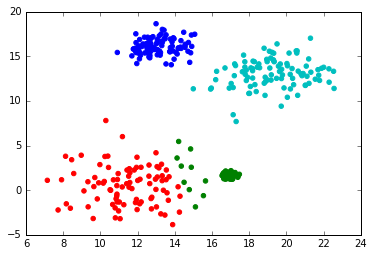

In [454]:
centroids, cluster_assignment = kmeans_iteration(k, X, centroids)
centroids
# reduce the dimensionality of the data set so we can plot it
# model = TSNE(n_components=2, perplexity=80, random_state=0)
# reduced = model.fit_transform(X)
reduced = X

colors = "rgbcyko"
cs = [colors[i] for i in cluster_assignment]

plt.scatter(reduced[:,0], reduced[:,1], color = cs)

In [150]:
cluster_assignment

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,